In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [6]:
df = pd.read_csv('train.csv', delimiter="|")
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


**Check the data information including the data type**

*as we can see the dont have object data type*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


# Preprocessing train.csv

**Check Duplicate and Mising value**

the result shows that on this dataset:
1.   There is no duplicate row
2.   There is no missing value
3.   The graph red represent missing value. Thus, there is no mising value



Duplicated row count: 0
Missing values
trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64


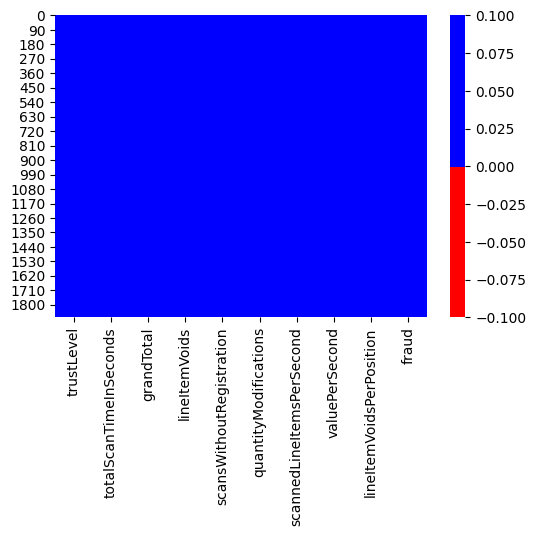

In [33]:
print('Duplicated row count: %d' %df.duplicated().sum())
print('Missing values\n%s' %df.isna().sum())
colours = ['red', 'blue']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

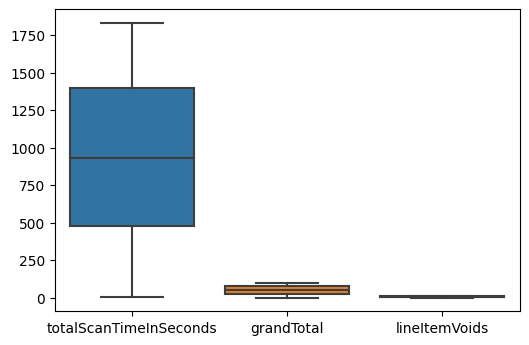

In [47]:
sns.boxplot(data=df[['totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids']])

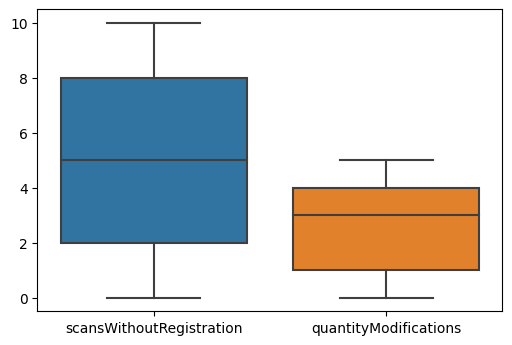

In [46]:
sns.boxplot(data=df[['scansWithoutRegistration', 'quantityModifications']])

**There is outlier in this 3 attribures**

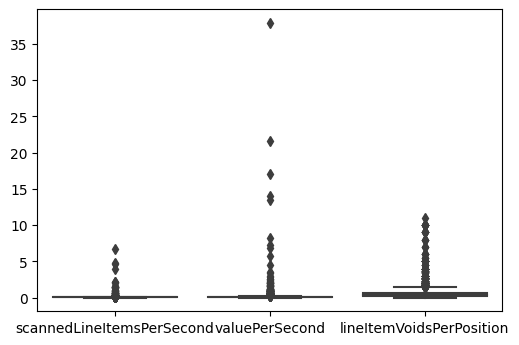

In [50]:
sns.boxplot(data=df[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']])

In [55]:
df[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']].describe()

,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
count,1879.000000,1879.000000,1879.000000
mean,0.058138,0.201746,0.745404
std,0.278512,1.242135,1.327241
min,0.000548,0.000007,0.000000
25%,0.008384,0.027787,0.160000
50%,0.016317,0.054498,0.350000
75%,0.032594,0.107313,0.666667
max,6.666667,37.870000,11.000000


**Change the Outlier with the median value**

we will replace the outlier with the 50% value on the outlier which are more than 95%.

In [59]:
#Check the value of the attribute in quantile 50
df[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']].quantile(0.50)

scannedLineItemsPerSecond    0.016317
valuePerSecond               0.054498
lineItemVoidsPerPosition     0.350000
Name: 0.5, dtype: float64

In [60]:
#Check the value of the attribute in quantile 95
df[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']].quantile(0.95)

scannedLineItemsPerSecond    0.156472
valuePerSecond               0.522967
lineItemVoidsPerPosition     3.000000
Name: 0.95, dtype: float64

,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
count,1879.000000,1879.000000,1879.000000
mean,0.050271,0.118182,0.165729
std,0.042429,0.100487,0.185413
min,0.000000,0.000000,0.000000
25%,0.010000,0.050000,0.053333
50%,0.039088,0.096460,0.116667
75%,0.083799,0.149147,0.196078
max,0.148938,0.509663,1.000000


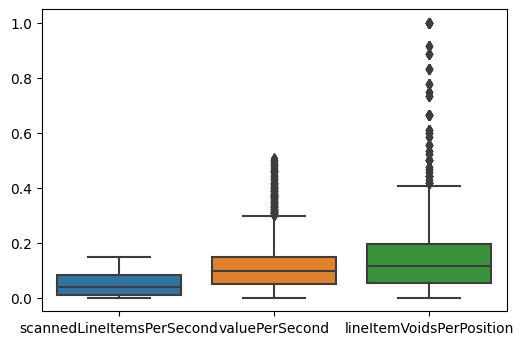

In [152]:
df['scannedLineItemsPerSecond'] = np.where(df['scannedLineItemsPerSecond'] > 0.15 , 0.01, df['scannedLineItemsPerSecond'])
df['valuePerSecond'] = np.where(df['valuePerSecond'] > 0.52 , 0.05, df['valuePerSecond'])
df['lineItemVoidsPerPosition'] = np.where(df['lineItemVoidsPerPosition'] > 3. , 0.35, df['lineItemVoidsPerPosition'])

sns.boxplot(data=df[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']])
df[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']].describe()

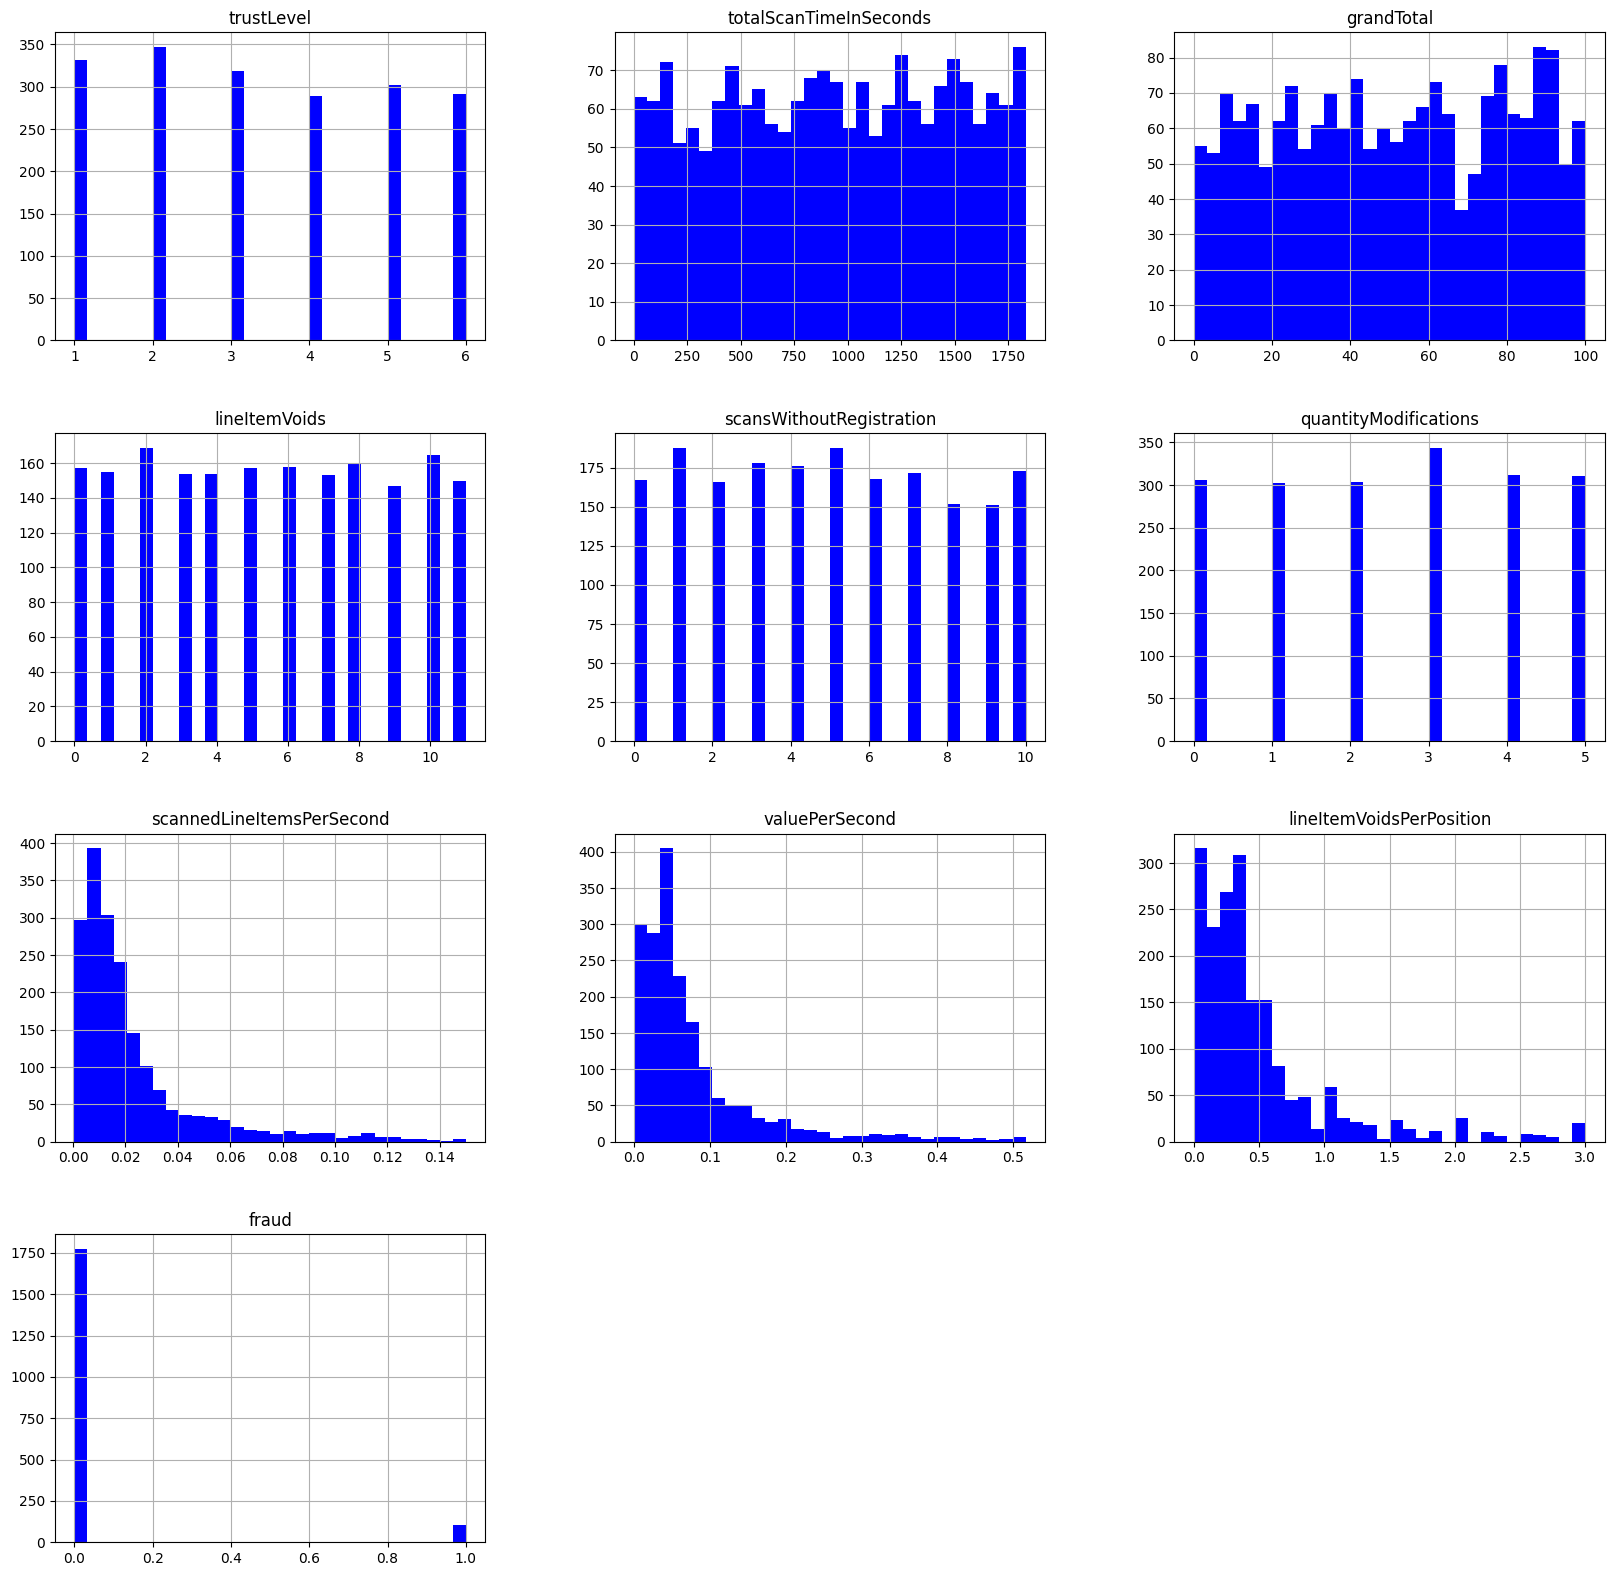

In [62]:
df.hist(bins = 30, figsize= (20,20), color = 'b');

Text(0.5, 1.0, 'Correlation Heatmap')

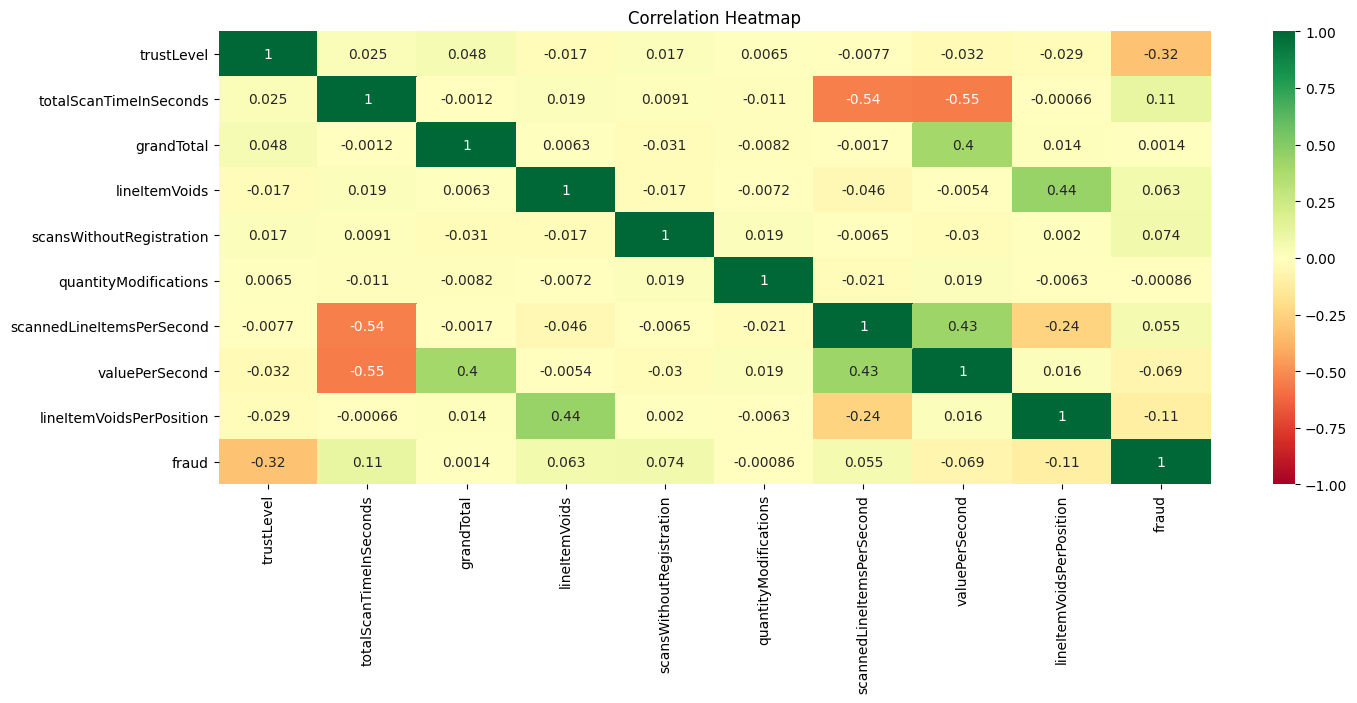

In [63]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="RdYlGn")
heatmap.set_title('Correlation Heatmap')



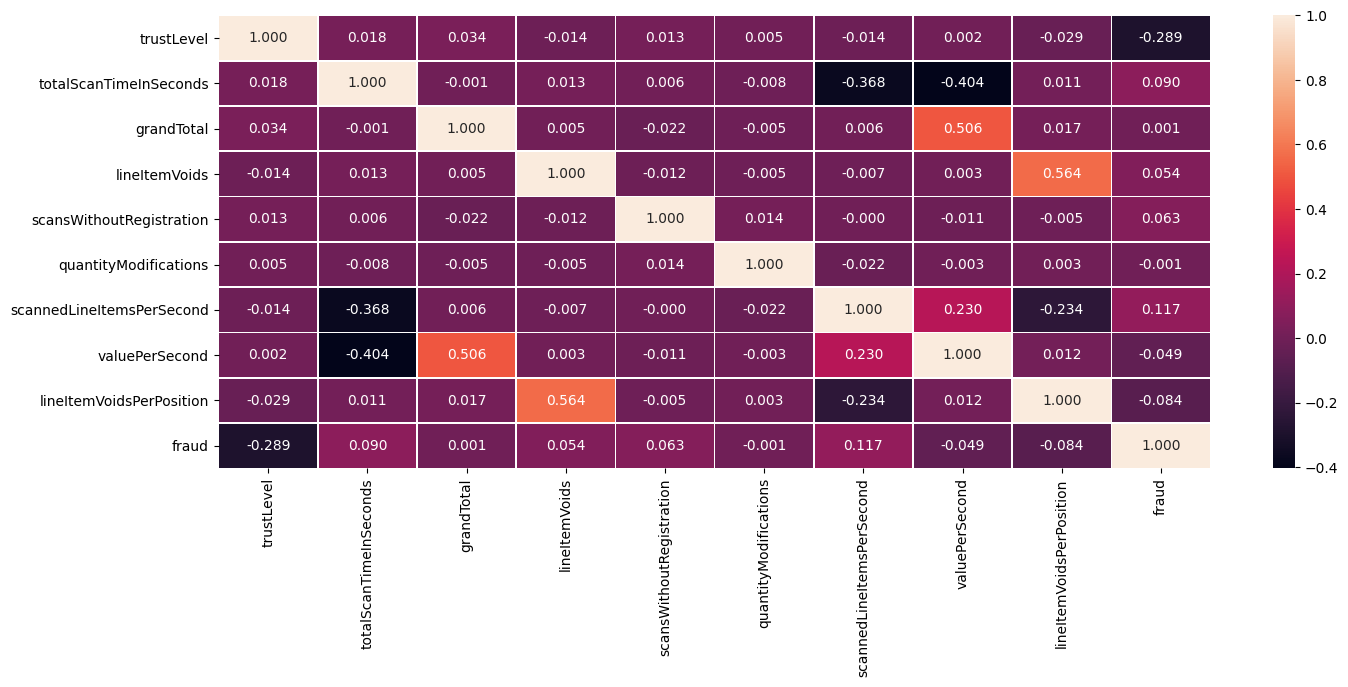

In [64]:
plt.figure(figsize=(16, 6))
cor = df.corr(method="kendall")
sns.heatmap(cor, annot=True, linewidths=.5, fmt='.3f')
plt.show()

In [67]:
Scaler = MinMaxScaler()
scalling = Scaler.fit_transform(df)
df = pd.DataFrame(scalling, columns =['trustLevel',	'totalScanTimeInSeconds',	'grandTotal',	'lineItemVoids',	'scansWithoutRegistration',	'quantityModifications',	'scannedLineItemsPerSecond',	'valuePerSecond',	'lineItemVoidsPerPosition',	'fraud' ])
df

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,0.8,0.575178,0.547174,0.636364,0.0,0.6,0.180434,0.100520,0.080460,0.0
1,0.4,0.057955,0.273637,0.454545,0.2,0.8,0.863700,0.490731,0.119048,0.0
2,0.4,0.827775,0.621811,0.272727,1.0,1.0,0.053711,0.079415,0.076923,0.0
3,1.0,0.978130,0.923462,0.727273,0.4,0.8,0.104677,0.099829,0.091954,0.0
4,0.8,0.234008,0.815608,0.272727,0.7,0.4,0.416473,0.367279,0.037037,0.0
...,...,...,...,...,...,...,...,...,...,...
1874,0.0,0.174412,0.760580,0.727273,0.7,0.4,0.475759,0.458807,0.115942,0.0
1875,0.0,0.215965,0.419010,0.454545,0.5,0.0,0.434542,0.204388,0.064103,1.0
1876,0.6,0.171679,0.418409,0.454545,0.8,0.2,0.631566,0.256414,0.055556,0.0
1877,0.2,0.373428,0.627014,0.090909,0.6,0.4,0.230767,0.177243,0.013889,0.0


# Preprocessing test.csv

In [68]:
df_test = pd.read_csv('test.csv', delimiter="|")
df_test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498121 entries, 0 to 498120
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   trustLevel                 498121 non-null  int64  
 1   totalScanTimeInSeconds     498121 non-null  int64  
 2   grandTotal                 498121 non-null  float64
 3   lineItemVoids              498121 non-null  int64  
 4   scansWithoutRegistration   498121 non-null  int64  
 5   quantityModifications      498121 non-null  int64  
 6   scannedLineItemsPerSecond  498121 non-null  float64
 7   valuePerSecond             498121 non-null  float64
 8   lineItemVoidsPerPosition   498121 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 34.2 MB


**Check Duplicate and Mising value**

the result shows that on this dataset:
1.   There is no duplicate row
2.   There is no missing value
3.   The graph red represent missing value. Thus, there is no mising value



Duplicated row count: 0
Missing values
trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
dtype: int64


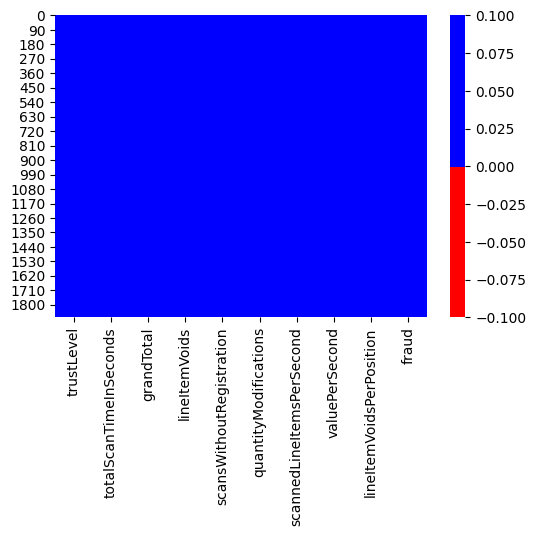

In [70]:
print('Duplicated row count: %d' %df_test.duplicated().sum())
print('Missing values\n%s' %df_test.isna().sum())
colours = ['red', 'blue']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

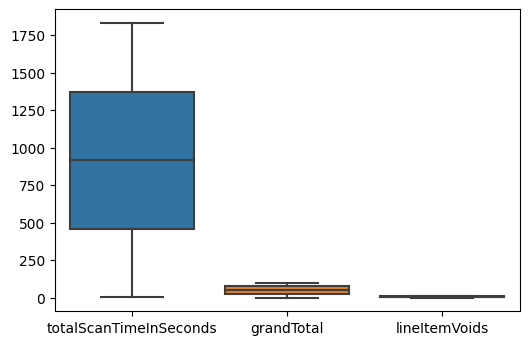

In [71]:
sns.boxplot(data=df_test[['totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids']])

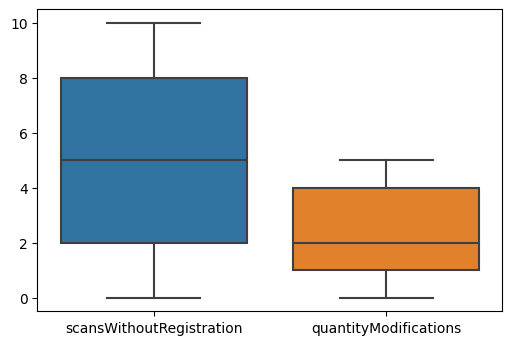

In [72]:
sns.boxplot(data=df_test[['scansWithoutRegistration', 'quantityModifications']])

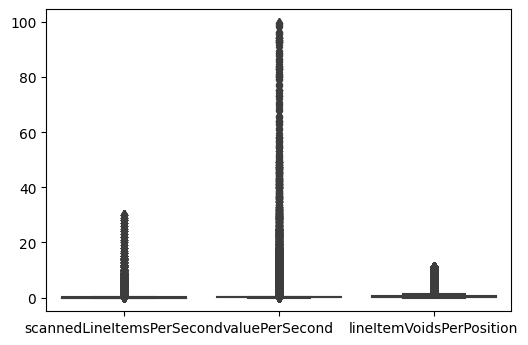

In [73]:
sns.boxplot(data=df_test[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']])

In [74]:
df_test[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']].describe()

,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
count,498121.000000,498121.000000,498121.000000
mean,0.068054,0.222182,0.735190
std,0.521092,1.717867,1.320235
min,0.000546,0.000000,0.000000
25%,0.008682,0.027348,0.160000
50%,0.016940,0.054550,0.352941
75%,0.033929,0.109091,0.692308
max,30.000000,99.710000,11.000000


**Change the Outlier with the median value**

we will replace the outlier with the 50% value on the outlier which are more than 95%.

In [75]:
#Check the value of the attribute in quantile 50
df_test[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']].quantile(0.50)

scannedLineItemsPerSecond    0.016940
valuePerSecond               0.054550
lineItemVoidsPerPosition     0.352941
Name: 0.5, dtype: float64

In [76]:
#Check the value of the attribute in quantile 95
df_test[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']].quantile(0.95)

scannedLineItemsPerSecond    0.168605
valuePerSecond               0.544512
lineItemVoidsPerPosition     3.000000
Name: 0.95, dtype: float64

,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
count,498121.000000,498121.000000,498121.000000
mean,0.023938,0.078727,0.498646
std,0.026400,0.087599,0.547933
min,0.000546,0.000000,0.000000
25%,0.008682,0.027348,0.160000
50%,0.015212,0.050000,0.350000
75%,0.028011,0.090826,0.600000
max,0.160000,0.540000,3.000000


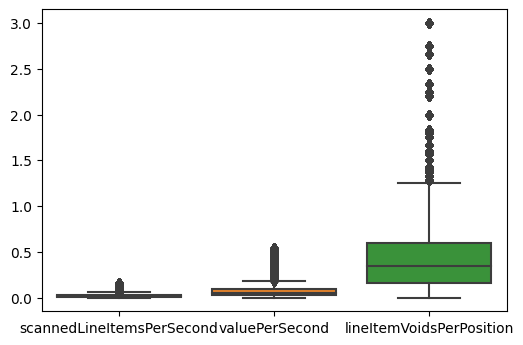

In [82]:
df_test['scannedLineItemsPerSecond'] = np.where(df_test['scannedLineItemsPerSecond'] > 0.16 , 0.01, df_test['scannedLineItemsPerSecond'])
df_test['valuePerSecond'] = np.where(df_test['valuePerSecond'] > 0.54 , 0.05, df_test['valuePerSecond'])
df_test['lineItemVoidsPerPosition'] = np.where(df_test['lineItemVoidsPerPosition'] > 3. , 0.35, df_test['lineItemVoidsPerPosition'])

sns.boxplot(data=df_test[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']])
df_test[['scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']].describe()

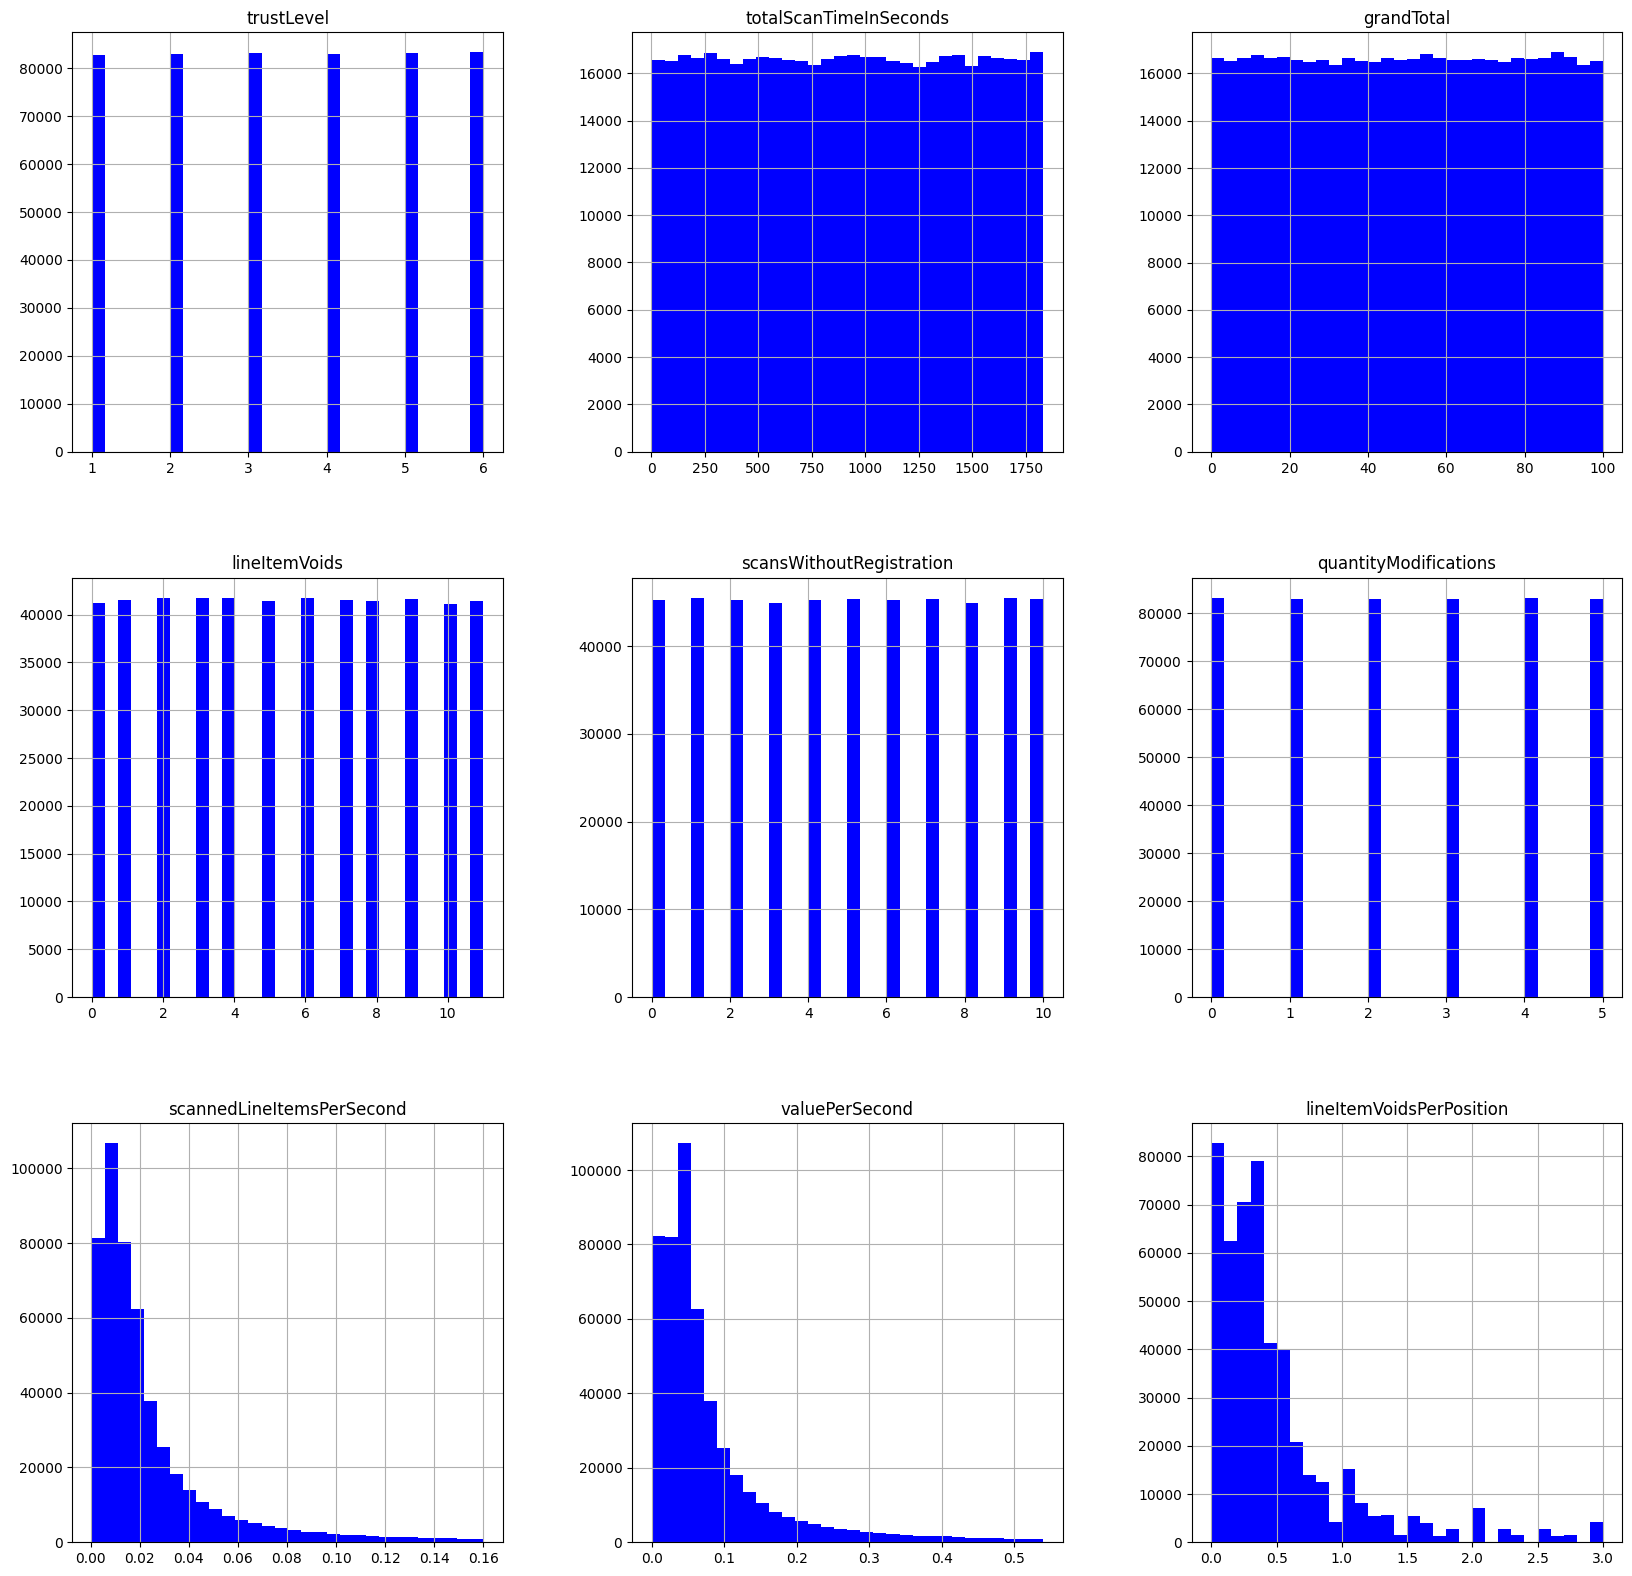

In [83]:
df_test.hist(bins = 30, figsize= (20,20), color = 'b');

Text(0.5, 1.0, 'Correlation Heatmap')

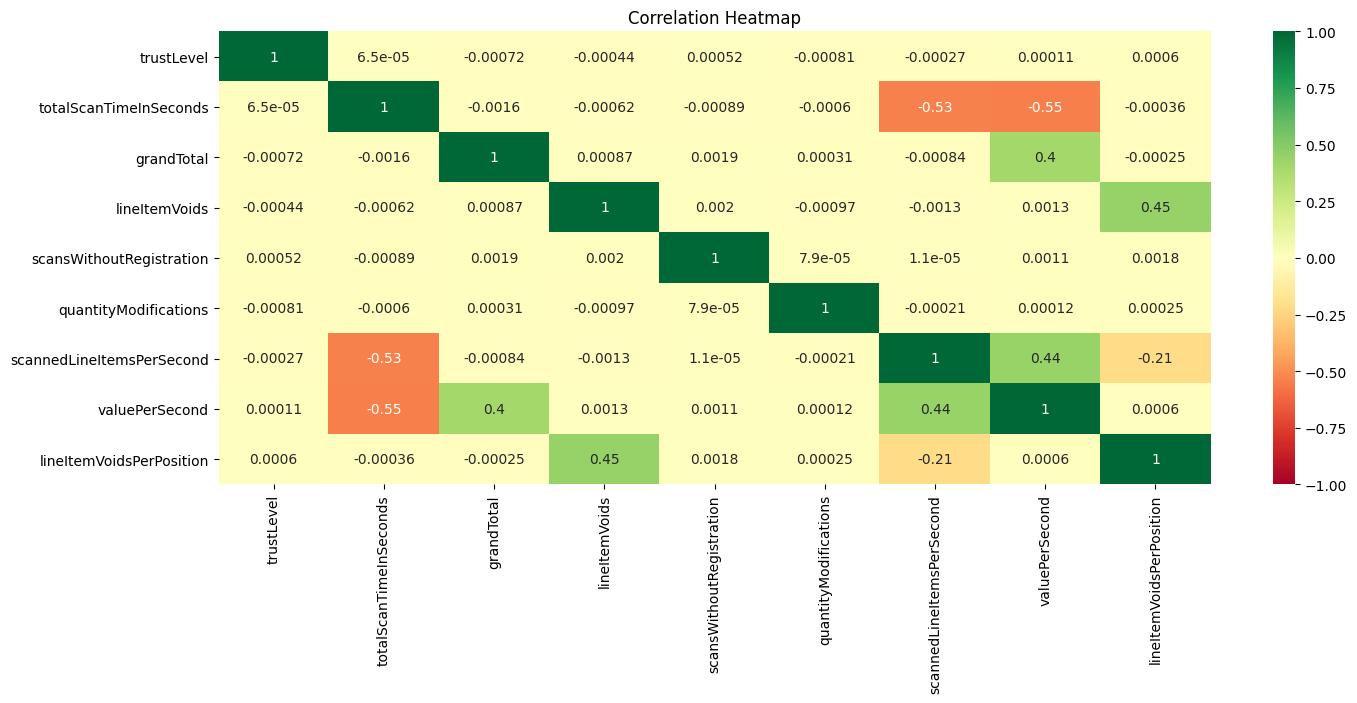

In [84]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df_test.corr(), vmin=-1, vmax=1, annot=True, cmap="RdYlGn")
heatmap.set_title('Correlation Heatmap')



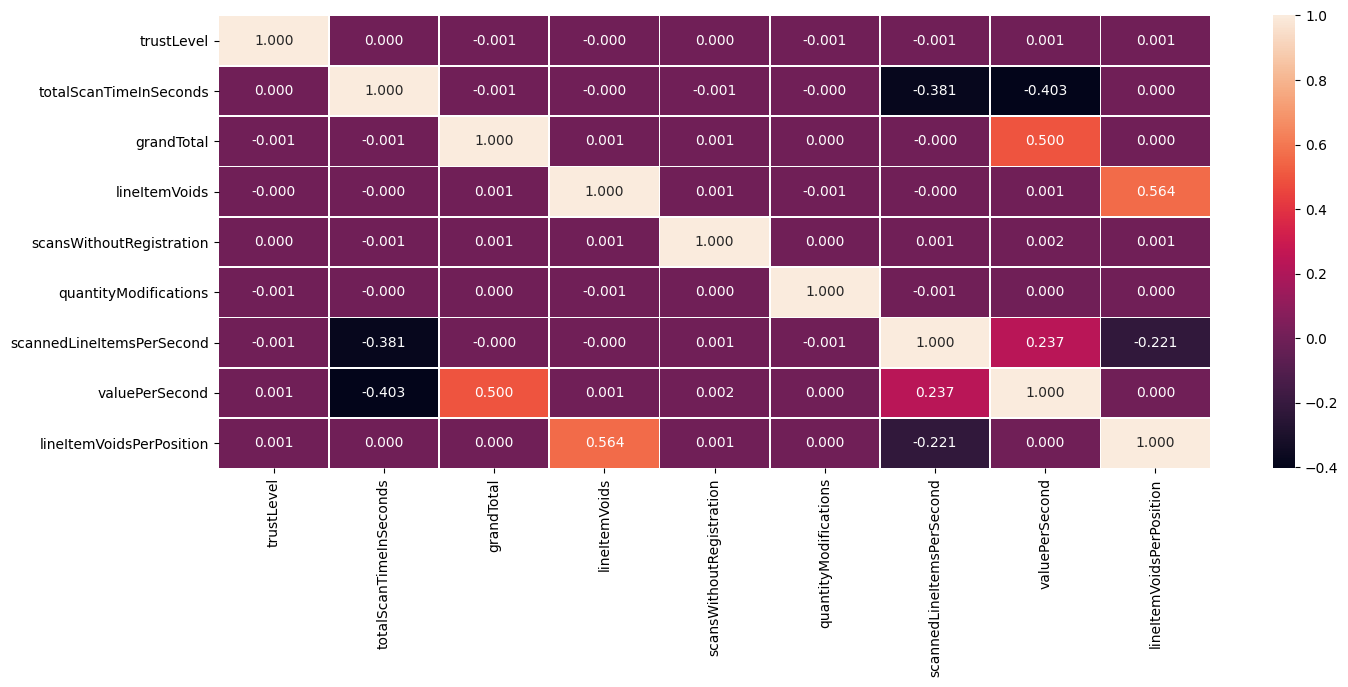

In [85]:
plt.figure(figsize=(16, 6))
cor = df_test.corr(method="kendall")
sns.heatmap(cor, annot=True, linewidths=.5, fmt='.3f')
plt.show()

In [87]:
Scaler = MinMaxScaler()
scalling = Scaler.fit_transform(df_test)
df_test = pd.DataFrame(scalling, columns =['trustLevel',	'totalScanTimeInSeconds',	'grandTotal',	'lineItemVoids',	'scansWithoutRegistration',	'quantityModifications',	'scannedLineItemsPerSecond',	'valuePerSecond',	'lineItemVoidsPerPosition'])
df_test

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,0.6,0.254645,0.884888,0.363636,0.8,0.8,0.090579,0.350860,0.190476
1,0.4,0.548087,0.589959,0.636364,0.6,0.2,0.165228,0.108806,0.086420
2,0.0,0.087978,0.140014,0.363636,0.5,0.8,0.035287,0.160037,0.116667
3,0.8,0.290164,0.847985,0.818182,0.3,0.8,0.161612,0.295148,0.214286
4,0.8,0.485792,0.421642,0.363636,0.0,0.0,0.130459,0.087724,0.070175
...,...,...,...,...,...,...,...,...,...
498116,0.6,0.427322,0.591059,0.181818,0.2,0.0,0.076669,0.139776,0.066667
498117,0.0,0.151366,0.989099,0.818182,0.5,0.8,0.312401,0.658806,0.214286
498118,0.4,0.163388,0.054105,0.545455,0.6,0.8,0.184717,0.033395,0.222222
498119,0.2,0.832240,0.339734,0.181818,0.5,0.6,0.033611,0.041278,0.074074


# Classification

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score

In [88]:
# x_train = df[['lineItemVoids','lineItemVoidsPerPosition']]
# y_train = df['fraud']
# x_test = df_test[['lineItemVoids','lineItemVoidsPerPosition']]

In [155]:
x_train = df[['trustLevel',	'totalScanTimeInSeconds',	'grandTotal',	'lineItemVoids',	'scansWithoutRegistration',	'quantityModifications',	'scannedLineItemsPerSecond',	'valuePerSecond',	'lineItemVoidsPerPosition']]
y_train = df['fraud']
x_test = df_test[['trustLevel',	'totalScanTimeInSeconds',	'grandTotal',	'lineItemVoids',	'scansWithoutRegistration',	'quantityModifications',	'scannedLineItemsPerSecond',	'valuePerSecond',	'lineItemVoidsPerPosition']]

In [110]:
x_test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,0.6,0.254645,0.884888,0.363636,0.8,0.8,0.090579,0.350860,0.190476
1,0.4,0.548087,0.589959,0.636364,0.6,0.2,0.165228,0.108806,0.086420
2,0.0,0.087978,0.140014,0.363636,0.5,0.8,0.035287,0.160037,0.116667
3,0.8,0.290164,0.847985,0.818182,0.3,0.8,0.161612,0.295148,0.214286
4,0.8,0.485792,0.421642,0.363636,0.0,0.0,0.130459,0.087724,0.070175


k_nearest Neighbour 

In [144]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_y_prediction = knn.predict(x_test)

**Cross validation for best K in KNN**

we found that k=5 is the best k out of 10 K tested

In [134]:
from sklearn.model_selection import cross_val_score
scoreK = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
scoreK


array([0.94148936, 0.95212766, 0.93617021, 0.93617021, 0.94680851,
       0.93617021, 0.95212766, 0.92553191, 0.94148936, 0.94117647])

**Neive Bayes**

In [162]:
nav_b = GaussianNB()
nb_train = nav_b.fit(x_train,y_train)
nb_y_prediction = nb_train.predict(x_test)

**Support Vector Machine**

In [159]:
sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
svm_y_predinction = sv.predict(x_test)

**data target is using to compare its accuracy with the 3 method that we have choosen**

In [ ]:
df_target = pd.read_csv("DMC-2019-realclass.csv")
df_target

In [172]:
accuracy1 = accuracy_score(df_target,knn_y_prediction)
accuracy2 = accuracy_score(df_target,nb_y_prediction)
accuracy3 = accuracy_score(df_target,svm_y_predinction)

print("KNN accuracy : ", accuracy1)
print("Naive Bayes accuracy : ", accuracy2)
print("SVM accuracy : ", accuracy1)

KNN accuracy :  0.9506344843923464
Naive Bayes accuracy :  0.8767046560976148
SVM accuracy :  0.9506344843923464
